<a href="https://colab.research.google.com/github/chaitragopalappa/MIE590-690D/blob/main/2_Lecture_NN_tabular_data_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks for Structured Data or Tabular data
## Feed Forward Neural Network (FFNN) / Multi-layer Perceptrons (MLP)
References:
* Chapter 13, Probabilistic Machine Learning: An Introduction by Kevin Murphy
---  



### Outline
* Objective function (minimize Loss) (supervised learning)
* Model architecture (Neural network)
  * Multiple layers of connected neurons/nodes  (multiple layers- 'deep' network )
  * Each node in each layer performs a linear transformation of data from previous layer and passes it through an activation function
  * Activation function: performs non-linear transformation of data
* Optimizer (model fitting, i.e., solving for NN coefficients that provide a good fit to data)
  * Backprop (backpropogation algorithhm): using SGD or its variants in a Directed Acyclic Graph (DAG) structure to solve for NN coefficients
    * AutoDiff (automatic differentiation) is used instead of symbolic differntiation to reduce complexity

---  



# Multi-Layer Perceptron (MLP)



## **Objective function**
Suppose ${\mathbf{y}}=f(\mathbf{{x}});\mathbf{x}\in \mathbb{R}^n; \mathbf{y}\in\mathbb{R}^m$  
Objective function: $ Min\mathcal{L}(\mathbf{\theta}) =Min_\mathbf{\theta}||\mathbf{\hat{y}-y}||_2^2$
* $\mathbf{\hat{y}} $ are predicted values from neural network
* $\mathcal{L} $ is the Loss   
* $\mathbf{\theta}=[\mathbf{b},\mathbf{W_1},\mathbf{W_2},...,\mathbf{W_L}]$ are neural network coefficients.

Thus, **'model fitting'** in context of NN refers to learning  $\mathbf{\theta}$ by minimizing the Loss function

---  

<table>
<tr>
<td style="width:50%; vertical-align:top;">

## **NN Model Architecture**

### Model architecture:
$z_L =f_L(z_{L−1})= f_L(f_{L-1}(z_{L−2}))=f_L(f_{L-1}(\dots f_1(z_{0}))) $  

>$ \mathbf{x} \triangleq z_0  $  
$\hat{y}  \triangleq  z_L$

or  
**$\hat{y}= f_L \circ f_{L-1}\circ f_{L-2} \dots \circ f_1$  (composition of functions)**

where,  
$\mathbf{\mathit{z}}_l = f_l(\mathbf{\mathit{z}}_{l−1}) = \varphi_l(\mathbf{\mathit{b}}_l +\mathbf{W}_l z_{l−1})$  (Vector form)  

> Rewriting in scalar form  
$z_{kl} = \varphi_l (b_{kl} +\sum_{j=1}^{K_{l-1}}{W}_{jkl}z_{jl−1})$  
The representation can be further simplified as   
$z_{kl} = \varphi_l (\sum_{j=0}^{K_{l-1}}{W}_{jkl}z_{jl−1})$  
by setting $z_{0l−1}=1$ and ${W}_{0kl}=b_{kl}$  

Putting back in vector form:  
$\mathbf{\mathit{z}}_l = \varphi_l (\mathbf{W}_l z_{l−1})$

</td>
<td style="width:50%; vertical-align:top;">

### General architecture of FFNN

* has an input layer representing the features with dimensionality equal to the number of input features,  
  i.e., $z_0 =\mathbf{x}= [x_1, \dots, x_n]$
* has an output layer representing the predicted variable with dimensionality equal to the output variable,  
  i.e., $z_L =\mathbf{\hat{y}}$; $L$ is the last layer
* has layers $l=1$ to $l=L-1$ as the hidden layers
* each hidden layer $l$ has $K_l$ number of nodes
* $z_{kl}$ is node $k$ in layer $l$
* $\mathbf{\mathit{z}}_l$ is a vector of nodes at layer $l$
* $b_{kl}$ is the bias node connecting to each node $k$ in layer $l$
* $\mathbf{W}_l$ is a matrix of coefficients; ${W}_{jkl}$ is coefficient from node $j$ in layer $l-1$ to node $k$ in layer $l$
* hidden units $z_l$ at each layer $l$ are a linear transformation of the hidden units at the previous layer  
  passed elementwise through an activation function
* $\varphi$ is an activation function (could be any differentiable function to add non-linearity; sigmoid, tanh, ReLU are common)
* typically a **fully connected** feedforward network (arrow from every node in layer $l-1$ to every node in layer $l$)

</td>
</tr>
</table>

---  

<table>
<tr>
<td style="width:50%; vertical-align:top;">

## **NN Model Architecture- EXAMPLE**
 $y=f(\mathbf{x});\mathbf{x}\in \mathbb{R}^5; y\in\mathbb{R}^1$  
 where,  
 $\sigma_{kl}=  φ_l (b_{kl} +\sum_{j=1}^{K_{l-1}}{W}_{jkl}v_{jl−1}) $ denotes an **activation function**  
  $\mathbf{\sigma}_l=  φ_l (\mathbf{b}_{l} +\mathbf{W}_{l}\mathbf{v}_{l−1})$ (matrix form)

### Model architecture:
![](https://raw.githubusercontent.com/chaitragopalappa/MIE590-690D/main/images/supply_chain_nn.png)

</td>
<td style="width:40%; vertical-align:top;">

 Thus, correspnding to example in the figure,
  - $y=f(\mathbf{W}_3,\mathbf{b}_3,\mathbf{v_2})$
  - $\mathbf{v}_{2}=\sigma(\mathbf{v}_{2}^*)$ ; output vector from hidden layer 2
  - $ \mathbf{v}_{2}^* =f(\mathbf{W}_2,\mathbf{b}_2,\mathbf{v_1})$ ; input vector to hidden layer 2
 - $\mathbf{v}_{1}=\sigma(\mathbf{v}_{1}^*)$  ; output vector from hidden layer 1
 - $\mathbf{v}_{1}^*=f(\mathbf{W}_1,\mathbf{b}_1,\mathbf{x})$ ; input vector to hidden layer 1
### General architecture of FFNN

* has an input layer representing the features with dimensionality equal to the number of input features,  
  i.e., $v_0 =\mathbf{x}= [x_1, \dots, x_n]$
* has an output layer representing the predicted variable with dimensionality equal to the output variable,  
  i.e., $v_L =\mathbf{\hat{y}}$; $L$ is the last layer
* has layers $l=1$ to $l=L-1$ as the hidden layers
* each hidden layer $l$ has $K_l$ number of nodes
* $v_{kl}$ is node $k$ in layer $l$
* $\mathbf{\mathbf{v}}_l$ is a vector of nodes at layer $l$
* $b_{kl}$ is the bias node connecting to each node $k$ in layer $l$
* $\mathbf{W}_l$ is a matrix of coefficients; ${W}_{jkl}$ is coefficient from node $j$ in layer $l-1$ to node $k$ in layer $l$
* hidden units $\mathbf{v}_l$ at each layer $l$ are a linear transformation of the hidden units at the previous layer  
  passed elementwise through an activation function
* $\varphi$ is an activation function (could be any differentiable function to add non-linearity; sigmoid, tanh, ReLU are common)
* typically a **fully connected** feedforward network (arrow from every node in layer $l-1$ to every node in layer $l$)

</td>
</tr>
</table>

---  

## **Activation functions**
Common used functions
\begin{array}{|l|l|l|l|}
\hline
\textbf{Name} & \textbf{Definition} & \textbf{Range} & \textbf{Reference} \\
\hline
\text{Sigmoid} & \sigma(a) = \frac{1}{1 + e^{-a}} & [0, 1] &  \\
\hline
\text{Hyperbolic tangent} & \tanh(a) = 2\sigma(2a) - 1 & [-1, 1] &  \\
\hline
\text{Softplus} & \sigma_{+}(a) = \log(1 + e^{a}) & [0, \infty) & \text{[GBB11]} \\
\hline
\text{Rectified linear unit} & \mathrm{ReLU}(a) = \max(a, 0) & [0, \infty) & \text{[GBB11; KSH12]} \\
\hline
\text{Leaky ReLU} & \max(a, 0) + \alpha \min(a, 0) & (-\infty, \infty) & \text{[MHN13]} \\
\hline
\text{Exponential linear unit} & \max(a, 0) + \min\big(\alpha(e^{a} - 1), 0\big) & (-\infty, \infty) & \text{[CUH16]} \\
\hline
\text{Swish} & a \, \sigma(a) & (-\infty, \infty) & \text{[RZL17]} \\
\hline
\text{GELU} & a \, \Phi(a) & (-\infty, \infty) & \text{[HG16]} \\
\hline
\end{array}
*Table Source:* Reproduced from Table 13.4 PML: An Introduction by Murphy

<p align="center">
  <img src="https://raw.githubusercontent.com/probml/pml-book/main/book1-figures/Figure_13.14_A.png" width="45%" />
  <img src="https://raw.githubusercontent.com/probml/pml-book/main/book1-figures/Figure_13.14_B.png" width="45%" />
</p>

<p align="center"><em>Figure 13.14 from PML: An Introduction by Murphy (Directly embedded figure from the textbook's GitHub repository)</em></p>


Addtional Reference: https://arxiv.org/abs/1811.03378

---  

## **Optimizer**
We can apply [stochastic gradient descent (SGD)](https://github.com/chaitragopalappa/MIE590-690D/blob/main/suppl_files/1suppl_Mathematical_foundations_of_ML.ipynb)   
1. Set $t=0$; Initialize weigths  ($\theta_{t=0}$); Set learning rate($η_t$); Set T (number of epochs)
2. For $t$= $0$ to T epochs   
> Repeat for each mini-batch  
>>  a.  Calculate gradients of $\mathcal{L}$ at the point $\theta_t$  (i.e., $∇_\mathbf{\theta}\mathcal{L}(\mathbf{\theta}_t)$ )  
>> b.  Update weights, i.e.,
  $\mathbf{\theta}_{t+1} = \mathbf{\theta}_t − η_t∇_\mathbf{\theta}\mathcal{L}(\mathbf{\theta}_t)$  

---
As discussed above
* $\mathbf{\theta}=[\mathbf{b},\mathbf{W_1},\mathbf{W_2},...,\mathbf{W_L}]$ are the coefficients of the neural network; each element is a matrix of coeffcients (i.e., each of these are to updated at every 'update weights' step of SDG
* **What is $\mathcal{L}(\theta)$?**
  * $\hat{y}= f_L \circ f_{L-1}\circ f_{L-2}.....\circ f_1$ (a composition of functions)
  * $\mathcal{L}(\theta)= ||{\hat{y}-y}||$ also written as $\mathcal{L((\mathbf{x},y),\theta)}= ||{\hat{y}-y}||$
  * $\mathcal{L}(\theta) \equiv f_L \circ f_{L-1}\circ f_{L-2}.....\circ f_1$
* **Estimate $∇_\mathbf{\theta}\mathcal{L}(\mathbf{\theta}_t)$ by applying chain-rule (equivalent to propogating backward through nueral net)**

 The above is collectively called **Backpropogation algorithm (or Backprop)**

---  






## EXAMPLE: **NN with 1 hidden layer**
Supose we have a NN with 1 hidden layer:
$\hat{y}= \mathbf{W}_2  \sigma(\mathbf{W}_1\mathbf{x}) + \mathbf{b}$  
Activation function is a sigmoid function; Bias in only output layer

We consider L2 loss in prediction:
Solve for $\mathbf{W}_1, \mathbf{W}_2, \mathbf{b}$ that minimize
$$
\mathcal{L}((\mathbf{x},y),\theta)
= \frac{1}{2}\|y - \mathbf{b} + \mathbf{W}_2 \, \sigma(\mathbf{W}_1 \mathbf{x})\|_2^2
$$

---

## Backpropagation Algorithm

**Initialize**
- Initialize parameters $\mathbf{W}_1, \mathbf{W}_2$, and bias $b$ randomly; Set T= epochs

> Repeat T epochs
  > 1. **Forward Pass**
> For each sample $p$:  
>>a. Hidden pre-activation:
   $
   \mathbf{v}_p^{*} = \mathbf{W}_1 \mathbf{x}_p
   $  
b. Hidden activation:
   $
   \mathbf{v}_p = \sigma(\mathbf{v}_p^{*}) = \frac{1}{1 + e^{-\mathbf{v}_p^{*}}}
   $  
c. Output prediction:
   $
   \hat{y}_p = b + \mathbf{W}_2 \mathbf{v}_p
   $

   >2. **Compute Loss**  $  L = \frac{1}{2} \sum_{p=1}^P \left(y_p - \hat{y}_p \right)^2 $


  >3. **Parameter Updates ( Stochastic Gradient Descent update)**  
 >> $b = b - \mu  \frac{\partial L}{\partial b} $  
 >> $ \mathbf{W}_{2} = \mathbf{W}_{2} - \mu  \frac{\partial L}{\partial \mathbf{W}_2}$    
 >> $\mathbf{W}_{1} = \mathbf{W}_{1} - \mu  \frac{\partial L}{\partial \mathbf{W}_1}$    

---





##<span style="color:blue;">**Symbolic differentiation**</span>  to  estimate $\frac{\partial L}{\partial b} , \frac{\partial L}{\partial \mathbf{W}_2}, \frac{\partial L}{\partial \mathbf{W}_1}$
 - $L = \frac{1}{2}\sum_{p=1}^P (y_p - \hat y_p)^2$  
- $\hat y_p = b + \mathbf{W}_2 \mathbf{v}_p$
- $ \mathbf{v}_p = \sigma(\mathbf{v}_p^{*})$ with $\sigma'(z)=\sigma(z)(1-\sigma(z))$
- $ \mathbf{v}_p^{*} = \mathbf{W}_1 \mathbf{x}_p$   
---
**1. Derivative w.r.t. bias ($b$)**
$$\frac{\partial L}{\partial \mathbf{b}}
= -\frac{2}{2}\sum_{p=1}^P (y_p - \hat y_p)\frac{\partial}{\partial b}( b + \mathbf{W}_2 \mathbf{v}_p)
= -\sum_{p=1}^P e_p \cdot 1$$
$$
e_p \triangleq y_p - \hat y_p .
$$

**2.  Derivative w.r.t. hidden-layer-output weights ($\mathbf{W}_2$)**

elementwise / matrix form:
$$
\frac{\partial L}{\partial \mathbf{W}_2}
= -\frac{2}{2}\sum_{p=1}^P (y_p - \hat y_p)\frac{\partial}{\partial W_2}( b + \mathbf{W}_2 \mathbf{v}_p)
= -\sum_{p=1}^P e_p \, \mathbf{v}_p^\top
\quad\text{(same shape as }\mathbf{W}_2\text{)}.
$$

($\mathbf{W}_2$ is matrix of size $1\times H$; $H$ is number of nodes in the hidden layer),

**3.  Derivative w.r.t. hidden-layer-input weights ($\mathbf{W}_1$)**
Apply chain rule through
$$
\frac{\partial L}{\partial \mathbf{W}_1}
= -\frac{2}{2}\sum_{p=1}^P (y_p - \hat y_p)\frac{\partial}{\partial W_1}(\hat y_p)
= -\frac{2}{2}\sum_{p=1}^P (y_p - \hat y_p)\frac{\partial(\hat y_p)}{\partial \mathbf{v}_p}\frac{\partial \mathbf{v}_p}{\partial \mathbf{v}_p^* }\frac{\partial \mathbf{v}_p^*}{\partial W_1}
$$



  $$
  \frac{\partial L}{\partial \mathbf{W}_1}
   = \sum_{p=1}^P \Big( e_p \, \mathbf{W}_2^\top \odot (\mathbf{v}_p \odot (1-\mathbf{v}_p)) \Big) \mathbf{x}_p^\top.
  $$

This produces the same shape as $\mathbf{W}_1$ (i.e. $H\times d$ if $\mathbf{x}_p\in\mathbb{R}^d$ and there are $H$ hidden units).

---



## Summary

- $e_p = \hat y_p - y_p$  
- $\displaystyle \frac{\partial L}{\partial b} = \sum_{p} e_p$  
- $\displaystyle \frac{\partial L}{\partial \mathbf{W}_2} = \sum_{p} e_p \,\mathbf{v}_p^\top$  
- $\displaystyle \frac{\partial L}{\partial \mathbf{W}_1} = \sum_{p} \Big( e_p \,\mathbf{W}_2^\top \odot (\mathbf{v}_p\odot(1-\mathbf{v}_p))\Big)\mathbf{x}_p^\top$

---


# EXample - **NN with 1 hidden layer**

In [ ]:
# @title Import/install packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

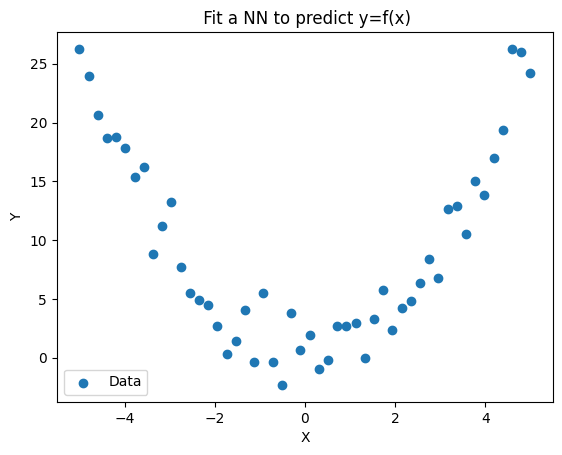

In [ ]:
# @title Generate Synthetic Data { vertical-output: true }
X = np.linspace(-5, 5, 50).reshape(-1, 1)
Y = X ** 2 + np.random.randn(50, 1) * 2
plt.scatter(X, Y, label='Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title(' Fit a NN to predict y=f(x)')
plt.show()

## Objective:  Fit a model to above data\\

In [ ]:
# @title Data processing and handling occur at this point (cleaning, vizualizing, normalizing, train and test sets, minibatching, etc.) { vertical-output: true }
#Skipping these steps to keep the focus on understanding NN

In [ ]:
#@title Initialize NN parameters { vertical-output: true }
# Define the neural network architecture
input_size = 1
output_size = 1
# Hyperparameters (try different values)
#Note: Number of hidden layer fixed at 1
hidden_layer_size = 5
learning_rate = 0.001 #try 0.001
epochs = 1000

# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_layer_size)
b1 = np.zeros((1, hidden_layer_size))
W2 = np.random.randn(hidden_layer_size, output_size)
b2 = np.zeros((1, output_size))

# Define the activation function (sigmoid)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)


#######################################################
from IPython.display import display, Markdown

display(Markdown("""**Initialize**
- Initialize parameters $\\mathbf{W}_1$, $\\mathbf{W}_2$, and bias $b$ randomly;
"""))



**Initialize**
- Initialize parameters $\mathbf{W}_1$, $\mathbf{W}_2$, and bias $b$ randomly;


In [ ]:
#@title Apply BackProp to training data { vertical-output: true }
# Training loop
loss_history = []
predicted_output_history = []

# BackProp Training loop
for epoch in range(epochs):
  # Forward pass
  hidden_layer_input = np.dot(X, W1) + b1
  hidden_layer_output = sigmoid(hidden_layer_input)
  output_layer_input = np.dot(hidden_layer_output, W2) + b2
  output_layer_output = output_layer_input # No activation for regression

  # Compute loss (mean squared error)
  loss = np.mean((Y - output_layer_output) ** 2)

  # Calculate gradients (using Symobolic differentiation)
  d_output = -(Y - output_layer_output)  #  e_p
  dL_db2= np.sum(d_output, axis=0, keepdims=True)
  dL_dW2= np.dot(hidden_layer_output.T, d_output)
  dL_db1= np.sum(np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output), axis=0, keepdims=True)
  dL_dW1= np.dot(X.T, np.dot(d_output, W2.T) * sigmoid_derivative(hidden_layer_output))

  # Update weights and biases (Stochastic gradient descent update)
  W2 -= learning_rate * dL_dW2  #
  b2 -= learning_rate * dL_db2
  W1 -= learning_rate * dL_dW1
  b1 -= learning_rate * dL_db1

  # Print the loss every 100 epochs
  #if epoch % 100 == 0:
    #print(f"Epoch {epoch}, Loss: {loss}")
   # Store predicted output for animation
  if epoch % 100 == 0:
    predicted_output_history.append(output_layer_output)


###########################################################################
#@title My Hidden Code Cell
from IPython.display import display, Markdown
display(Markdown(r"""
Repeat T epochs
1. **Forward Pass**
 For each sample $p$:
 $ \mathbf{v}_p^{*} = \mathbf{W}_1 \mathbf{x}_p$
 $\mathbf{v}_p = \sigma(\mathbf{v}_p^{*}) = \frac{1}{1 + e^{-\mathbf{v}_p^{*}}}$
 $\hat{y}_p = b + \mathbf{W}_2 \mathbf{v}_p$
 2. **Compute Loss**
 $L = \frac{1}{2} \sum_{p=1}^P \left(y_p - \hat{y}_p \right)^2$
 3. **Calculate gradients (using Symobolic differentiation)**
 $e_p = \hat y_p - y_p$
 $\displaystyle \frac{\partial L}{\partial b} = \sum_{p} e_p$
 $\displaystyle \frac{\partial L}{\partial \mathbf{W}_2} = \sum_{p} e_p \,\mathbf{v}_p^\top$
 $\displaystyle \frac{\partial L}{\partial \mathbf{W}_1} = \sum_{p} \Big( e_p \,\mathbf{W}_2^\top \odot (\mathbf{v}_p\odot(1-\mathbf{v}_p))\Big)\mathbf{x}_p^\top$
  4. **Do SGD updates**
 $b = b - \mu  \frac{\partial E}{\partial b} $
 $ \mathbf{W}_{2} = \mathbf{W}_{2} - \mu  \frac{\partial E}{\partial \mathbf{W}_2}$
 $\mathbf{W}_{1} = \mathbf{W}_{1} - \mu  \frac{\partial E}{\partial \mathbf{W}_1}$
"""))


Repeat T epochs
1. **Forward Pass**
 For each sample $p$:
 $ \mathbf{v}_p^{*} = \mathbf{W}_1 \mathbf{x}_p$
 $\mathbf{v}_p = \sigma(\mathbf{v}_p^{*}) = \frac{1}{1 + e^{-\mathbf{v}_p^{*}}}$
 $\hat{y}_p = b + \mathbf{W}_2 \mathbf{v}_p$
 2. **Compute Loss**
 $L = \frac{1}{2} \sum_{p=1}^P \left(y_p - \hat{y}_p \right)^2$
 3. **Calculate gradients (using Symobolic differentiation)**
 $e_p = \hat y_p - y_p$
 $\displaystyle \frac{\partial L}{\partial b} = \sum_{p} e_p$
 $\displaystyle \frac{\partial L}{\partial \mathbf{W}_2} = \sum_{p} e_p \,\mathbf{v}_p^\top$
 $\displaystyle \frac{\partial L}{\partial \mathbf{W}_1} = \sum_{p} \Big( e_p \,\mathbf{W}_2^\top \odot (\mathbf{v}_p\odot(1-\mathbf{v}_p))\Big)\mathbf{x}_p^\top$
  4. **Do SGD updates**
 $b = b - \mu  \frac{\partial E}{\partial b} $
 $ \mathbf{W}_{2} = \mathbf{W}_{2} - \mu  \frac{\partial E}{\partial \mathbf{W}_2}$
 $\mathbf{W}_{1} = \mathbf{W}_{1} - \mu  \frac{\partial E}{\partial \mathbf{W}_1}$


In [ ]:
#@title Validate on test data would be done here (ignoring it here to focus on basic understanding NN)

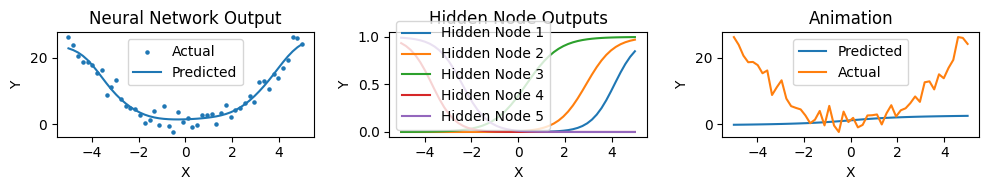

In [ ]:
#@title Plot predicted and actual data - also vizualize the outputs from each hidden node to understand the inner workings
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 2))


# Plot actual vs predicted in the first subplot
ax1.scatter(X, Y, label="Actual", s=5)
ax1.plot(X, output_layer_output, label="Predicted")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_title("Neural Network Output")
ax1.legend()

# Plot the output from each hidden node in the second subplot
for i in range(hidden_layer_size):
  ax2.plot(X, hidden_layer_output[:,i], label=f"Hidden Node {i+1}")

ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Hidden Node Outputs")
ax2.legend()

#fig, ax = plt.subplots(figsize=(4, 4))
line_predicted, = ax3.plot(X, predicted_output_history[0], label="Predicted")
line_actual, = ax3.plot(X, Y, label="Actual")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_title("Animation")
ax3.legend()

def animate(i):
  line_predicted.set_data(X, predicted_output_history[i])
  return line_predicted,

ani = FuncAnimation(fig, animate, frames=len(predicted_output_history), interval=1, blit=True)
plt.tight_layout()  # Adjust spacing between subplots
plt.show()
# Display the animation
HTML(ani.to_jshtml())


##<span style="color:blue;">**Automatic differentiation**</span>  to  estimate $\frac{\partial L}{\partial b} , \frac{\partial L}{\partial \mathbf{W}_2}, \frac{\partial L}{\partial \mathbf{W}_1}$
General overview:
* As number of hidden layers increase, become too complex to use symbolic differntiation
* Keeping the principles of chain rule use reverse mode automatic differentiation
---
**Example**: For a FFNN with a single hidden-layer the objective function is
 $\mathcal{L((\textbf{x},y),\theta)}= ||{\hat{y}-y}||= \frac{1}{2}||y-\mathbf{W}_2  φ(\mathbf{W}_1\mathbf{x})||_2^2 $



>**Feed forward pass** (to calculate Loss)

>> $\mathcal{L}=f_4 \circ f_3 \circ f_2 \circ f_1$    
 $(\mathbf{x}=\mathbf{x}_1)$  
 $\mathbf{x}_2= f_1(\mathbf{x},\theta_1 )= f_1(\mathbf{x}, \mathbf{W}_1) =\mathbf{W}_1\mathbf{x} $    
 $\mathbf{x}_3= f_2(\mathbf{x}_2,\theta_2) = f_2(\mathbf{x_2},{φ})={φ}(\mathbf{x_2})$  
 $\mathbf{x}_4= f_3(\mathbf{x_3},\theta_3 )= f_3(\mathbf{x}, \mathbf{W}_2) =\mathbf{W}_2\mathbf{x}_3$  
 $o=\mathcal{L} = f_4 (\mathbf{x_4},y)=\frac{1}{2}||y-x_4||_2^2 $

>**Backward pass** (to calculate gradient by applying principles of chain rule)
>> $\frac{\partial \mathcal{L}}{\partial x_4} = \frac{\partial \mathcal{L}}{\partial x_4}$  
$\frac{\partial \mathcal{L}}{\partial \theta_3} = \frac{\partial \mathcal{L}}{\partial x_4} \frac{\partial x_4}{\partial \theta_3}$  
$\frac{\partial \mathcal{L}}{\partial x_3}  = \frac{\partial \mathcal{L}}{\partial \theta_3} \frac{\partial \theta_3}{\partial x_3}$  
$ \frac{\partial \mathcal{L}}{\partial \theta_2}  = \frac{\partial \mathcal{L}}{\partial x_3} \frac{\partial x_3}{\partial \theta_2}$   
$\frac{\partial \mathcal{L}}{\partial x_2}  = \frac{\partial \mathcal{L}}{\partial \theta_2} \frac{\partial \theta_2}{\partial x_2}$     
$\frac{\partial \mathcal{L}}{\partial \theta_1}
= \frac{\partial \mathcal{L}}{\partial x_2}  \frac{\partial x_2}{\partial \theta_1}
$

---  



### **Backpropagation -general algorithm**
$$
\begin{array}{l}
\textbf{Algorithm: Backpropagation for an MLP with $K$ layers used inside SDG loop} \\[2mm]
\text{// Forward pass} \\
1: \quad x_1 := x \\
2: \quad \text{for } k = 1 : K \ \text{do} \\
3: \quad\quad x_{k+1} = f_k(x_k, \theta_k) \\[2mm]
\text{// Backward pass} \\
4: \quad u_{K+1} := 1 \\
5: \quad \text{for } k = K : 1 \ \text{do} \\
6: \quad\quad g_k := u_{k+1}^\top \frac{\partial f_k(x_k, \theta_k)}{\partial \theta_k} \\
7: \quad\quad u_k^\top := u_{k+1}^\top \frac{\partial f_k(x_k, \theta_k)}{\partial x_k} \\[2mm]
\text{// Output} \\
8: Return \quad \mathcal{L} = x_{K+1}, \quad \nabla_x \mathcal{L} = u_1, \quad \{\nabla_{\theta_k} \mathcal{L} = g_k : k = 1 : K\}
\end{array}
$$

---  